## NLP ASSIGNMENT 1
### Name: Sameeksha Kini
### Roll No: J029

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1','v2']]
df=df.rename(columns={'v1': 'Class','v2': 'Message'})
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.isnull().sum()

Class      0
Message    0
dtype: int64

**Spam VS Ham Count**

<bound method Axes.set_title of <matplotlib.axes._subplots.AxesSubplot object at 0x7f3cc22c0cd0>>

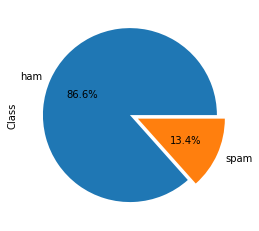

In [8]:
df['Class'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%')

**WordCloud**

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def w_cloud(df, title):
    comment_words = ''
    for val in df:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black', colormap='Set2',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plotting the WordCloud image                      
    pt.figure(figsize = (5, 5), facecolor = None)
    pt.imshow(wordcloud)
    pt.title(title)
    pt.axis("off")
    pt.tight_layout(pad = 0)

    pt.show()

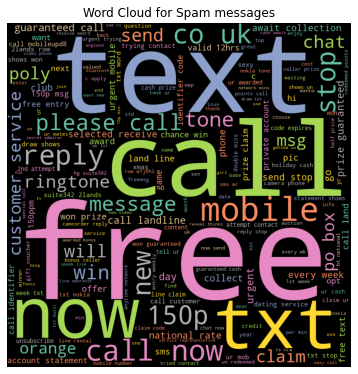

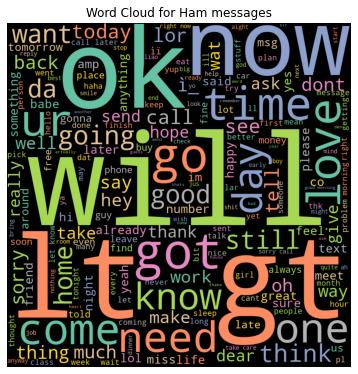

In [12]:
w_cloud(df[(df['Class'] == "spam")].Message, 'Word Cloud for Spam messages')
w_cloud(df[(df['Class'] == "ham")].Message, 'Word Cloud for Ham messages')

**Preprocessing the Data**

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [15]:
to_be_removed = list(stopwords)+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['Message'].tolist()
for i in range(10):
    print(corpus[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R enti

In [16]:
final_corpus = []
for i in range(len(corpus)):
    word = word_tokenize(corpus[i].lower())
    word = [stemmer.stem(y) for y in word if y not in to_be_removed]
    j = " ".join(word)
    final_corpus.append(j)

for j in range(10):
    print(final_corpus[j])

go jurong point crazy.. avail bug n gre world la e buffet ... cin got am wat ...
ok lar ... jok wif u on ...
fre entry 2 wkly comp win fa cup fin tkts 21st may 2005. text fa 87121 receiv entry quest std txt rat t c 's apply 08452810075over18 's
u dun say ear hor ... u c already say ...
nah n't think goe usf liv around though
freemsg hey darl 's 3 week 's now word back 'd fun stil tb ok xxx std chgs send å£1.50 rcv
ev broth speak tre aid pat
per request 'melle mel oru minnaminungint nurungu vettam set callertun cal press *9 cop friend callertun
win valu network custom select receive å£900 priz reward claim cal 09061701461. claim cod kl341 valid 12 hour
mobl 11 month u entitl upd latest colo mobl camer fre cal mobl upd co fre 08002986030


**TF-IDF Vectorizer**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
print(X)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Fitting the Model**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X, df['Class'].to_list(), test_size = 0.2, random_state = 42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()
ab.fit(X_train,y_train)
ypred = ab.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Naive Bayes Accuracy:',accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Naive Bayes Accuracy: 0.9632286995515695
[[965   0]
 [ 41 109]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [20]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
ypred = dc.predict(X_test)

print('Decision Tree Accuracy:',accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Decision Tree Accuracy: 0.9659192825112107
[[945  20]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.87      0.88      0.87       150

    accuracy                           0.97      1115
   macro avg       0.92      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred = rf.predict(X_test)

print('Random Forest Accuracy:',accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Random Forest Accuracy: 0.979372197309417
[[965   0]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
ypred = svm.predict(X_test)

print('SVM Accuracy:',accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

SVM Accuracy: 0.9721973094170404
[[962   3]
 [ 28 122]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Random Forest Classifier has the best performing model.